#Assignment 2:

Test the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson. 

Use:
1) KS 2) KL or Chisq 3) AD

6 test total (8 if you are ambitious and want to try Pearson's chisq)

Using scipy.stats package for this. For KS and AD you will simply need to generate the distribution the normal will be tested agains: the KS and AD functions in scipy have functionality to test against standard distributions (normal, chisq etc) without you having to code up anything about the distribution itself. KL and chisq do not. I am showing you how to do the AD, KS and KL for binomial, you can replicate it for the poisson or do the Chisq instead of KL.



In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

#import os
#import json
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


here are the manual pages for the tests
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

In [2]:
#generate the distribution
#my seed is 2015 because we are in 2015!!
np.random.seed(2015)

dist_n = np.random.randn(1000)

#test ad and ks. those are easy
print "KS: normal on normal", scipy.stats.kstest(dist_n,'norm')
print "AD: normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "CS: normal on normal", scipy.stats.chisquare(dist_n)
print "" 

dist_b = np.random.binomial(1, 0.5, 1000)

print "KS: poisson on normal", scipy.stats.kstest(dist_b,'norm')
print "AD: poisson on normal", scipy.stats.anderson(dist_b, dist='norm')
print "CS: poisson on normal", scipy.stats.chisquare(dist_b)


threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

##what is this threshold I am saving??

KS: normal on normal (0.01890424961517756, 0.86717598486321534)
AD: normal on normal (0.3511409513378112, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
CS: normal on normal (-92075.295048108557, 1.0)

KS: poisson on normal (0.5, 0.0)
AD: poisson on normal (179.53747488153613, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
CS: poisson on normal (492.00000000000006, 1.0)
[ 1.088]


Testing interpretation:
Normal on Normal: For KS: Using a confidence interval of 95%, our critical value is 1.38, and our KS stat is 0.018. Since 0.018 < 1.38, we fail to reject the Ho, so the two distributions. For AD: For Chisq:
Poisson on Normal: For KS: For AD: For Chisq:
The threshold of 1.088 means...

###Generating our binomial samples

Federica: to store the data i am generating an empty array of the size of the values of n i want to test I do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght

In [3]:
myarray = range(1,100,1) #creates an array of increasing sizes 1 through 100
#I played with the sizes (ex: and my graphs all tendeded towards one

ks_b = np.zeros(len(myarray)) #empty arrays as a holder for our KS statistics
ad_b = np.zeros(len(myarray))
kl_b = np.zeros(len(myarray))

for i,n in enumerate(myarray):
    #generate the distribution
    dist_b = np.random.binomial(n, 0.5,100)
    ks_b[i] = scipy.stats.kstest(dist_b,'norm')[0]
    ad_b[i] = scipy.stats.anderson(dist_b,'norm')[0]
    mybins=np.linspace(min(dist_b),max(dist_b), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_b[i] = scipy.stats.entropy(np.histogram(dist_b, bins=mybins)[0], scipy.stats.norm.pdf(bincenters)+n)
print "Our array of KS values: ", ks_b
print "Our array of Anderson values: ", ad_b
print "Our array of KL values: ", kl_b

threshold = scipy.stats.anderson(dist_b, dist='norm')[1][scipy.stats.anderson(dist_b, dist='norm')[2]==[1.0]]
print threshold
#threshold is the maximum p value?

Our array of KS values:  [ 0.5         0.60134475  0.75134475  0.81134475  0.83724987  0.87724987
  0.91724987  0.94724987  0.97724987  0.94724987  0.96724987  0.97724987
  0.9686501   0.99996833  0.9986501   0.98996833  0.98996833  0.99996833
  1.          1.          0.99996833  1.          0.99999971  1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1

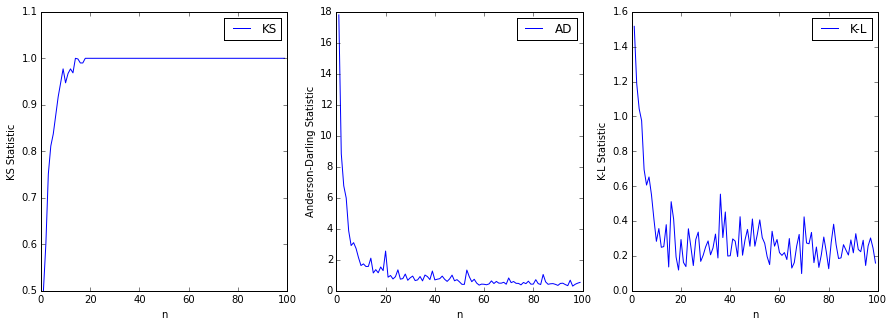

In [4]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(myarray, ks_b, label='KS')
pl.xlabel('n')
pl.legend()
pl.ylabel('KS Statistic')

fig.add_subplot(132)
pl.plot(myarray, ad_b, label='AD')
pl.legend()
pl.xlabel('n')
pl.ylabel('Anderson-Darling Statistic')

fig.add_subplot(133)
pl.plot(myarray, kl_b, label='K-L')
pl.legend()
pl.xlabel('n')
pl.ylabel('K-L Statistic')

###Caption
These plots compare the results of our tests. We can see as the age increases, our tests tend towards 0.
What I don't understand is why does the KS test tell us the data is stabilized around 20?


#Doing the same for Poisson

In [11]:
myarray = range(1,50,1)
ks_p = np.zeros(len(myarray))
ad_p = np.zeros(len(myarray))
kl_p = np.zeros(len(myarray))
#chi2_b = np.zeros(len(myarray))


for i,n in enumerate(myarray):
    #generate the distribution
    dist_p = np.random.poisson(n,100)
    ks_p[i] = scipy.stats.kstest(dist_p,'norm')[0]
    ad_p[i] = scipy.stats.anderson(dist_p,'norm')[0]
    mybins=np.linspace(min(dist_p),max(dist_p), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_p[i] = scipy.stats.entropy(np.histogram(dist_p, bins=mybins)[0], scipy.stats.norm.pdf(bincenters)+n)
print "Our array of KS values: ", ks_p
print "Our array of Anderson values: ", ad_p
print "Our array of KL values: ", kl_p

threshold = scipy.stats.anderson(dist_p, dist='norm')[1][scipy.stats.anderson(dist_p, dist='norm')[2]==[1.0]]
print "This is the maximum p value:", threshold

Our array of KS values:  [ 0.5         0.71134475  0.78134475  0.92724987  0.94724987  0.95724987
  0.9886501   0.9986501   0.98996833  0.9986501   0.99996833  0.99999971
  0.99999971  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.        ]
Our array of Anderson values:  [ 6.59509342  3.50353265  1.91090772  2.21444529  1.0585765   0.92735337
  2.04280867  0.95988538  0.96685417  1.43366405  0.68154309  0.51950316
  0.65650721  0.82395229  0.81443057  0.73661925  0.608074    0.57032956
  0.51377848  0.52570207  0.39049094  0.45198141  0.32853877  0.46146336
  0.60462619  0.45125161  0.68644734  0.65752753  0.4322808   0.9338777
  0.67833502  0.5296927

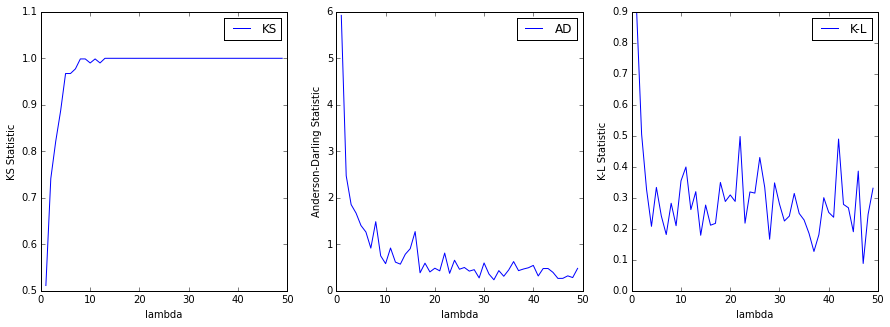

In [9]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(myarray, ks_p, label='KS')
pl.xlabel('lambda')
pl.legend()
pl.ylabel('KS Statistic')

fig.add_subplot(132)
pl.plot(myarray, ad_p, label='AD')
pl.legend()
pl.xlabel('lambda')
pl.ylabel('Anderson-Darling Statistic')

fig.add_subplot(133)
pl.plot(myarray, kl_p, label='K-L')
pl.legend()
pl.xlabel('lambda')
pl.ylabel('K-L Statistic')

#Caption
These plots compare a smaller array size, but follow a similar behavior as above.